In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### Independent features and dependent features

In [3]:
x = df[["Weight"]]
y = df["Height"]

In [4]:
x.shape,y.shape

((23, 1), (23,))

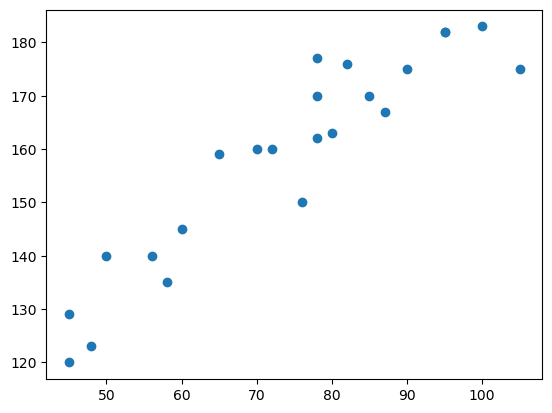

In [8]:
plt.scatter(x,y)

#### Train Test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

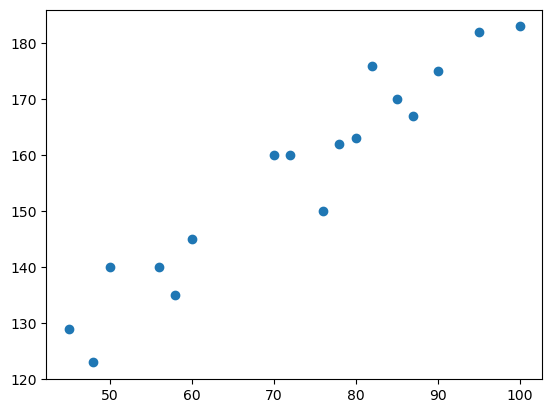

In [7]:
plt.scatter(x_train,y_train)

### Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

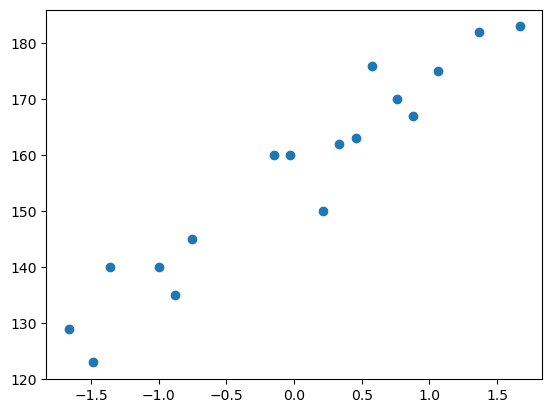

In [13]:
plt.scatter(x_train_scale,y_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linreg = LinearRegression()
linreg.fit(x_train_scale,y_train)

LinearRegression()

In [19]:
linreg.intercept_

156.47058823529412

In [18]:
linreg.coef_

array([17.2982057])

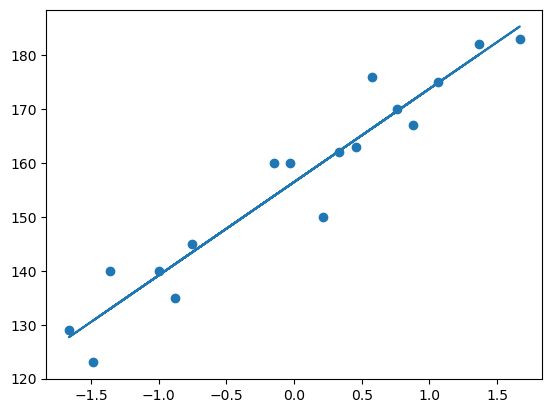

In [17]:
plt.scatter(x_train_scale,y_train)
plt.plot(x_train_scale,linreg.predict(x_train_scale))

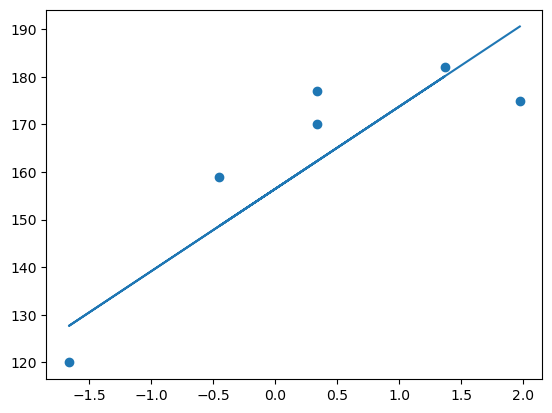

In [21]:
y_test_pred = linreg.predict(x_test_scale)
plt.scatter(x_test_scale,y_test)
plt.plot(x_test_scale,y_test_pred)

#### check the performance

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mse = mean_squared_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


#### check the accuracy

In [24]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_test_pred)
score

0.7360826717981276

#### adjusted r square

In [27]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

#### test for new data

In [29]:
new_data = scaler.transform([[80]])
new_data

C:\Users\Nags\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [30]:
linreg.predict(new_data)

array([164.36084726])

### Assumsions

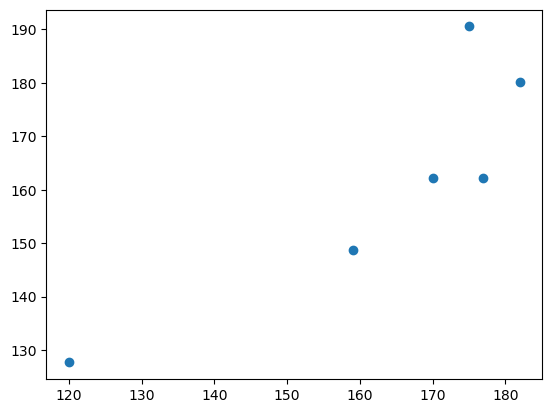

In [31]:
plt.scatter(y_test,y_test_pred)

C:\Users\Nags\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


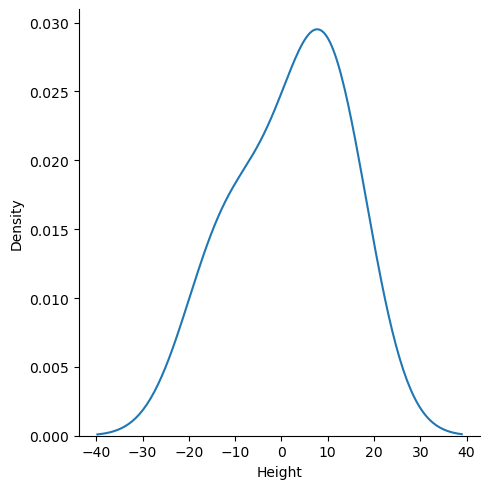

In [32]:
residuals = y_test-y_test_pred
sns.displot(residuals,kind='kde')

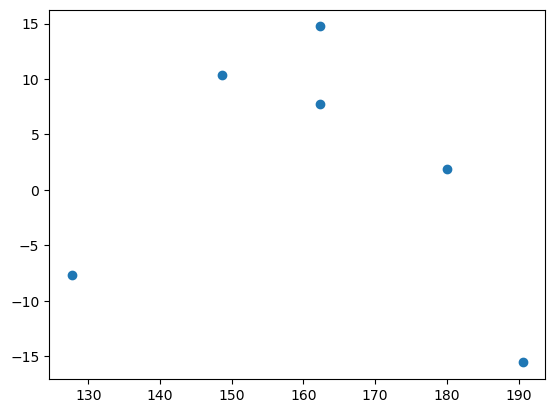

In [34]:
plt.scatter(y_test_pred,residuals)